##**SANJAY RAJ S**
##**TASK 1 - CUSTOMER CHURN PREDICTION**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
data =pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.drop(columns = ['RowNumber','CustomerId','Surname','Gender'], inplace= True )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Step 2: Load Data
data = pd.read_csv('/content/Churn_Modelling.csv')  # Replace with your dataset path

# Display the first few rows of the dataframe
print(data.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
# Step 3: Data Preprocessing
# Handle categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Separate features and target
X = data.drop('Exited', axis=1)  # Features
y = data['Exited']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 4: Train Models
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Gradient Boosting
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)


GradientBoostingClassifier()

In [ ]:
# Step 5: Evaluate Models
models = [log_reg, random_forest, grad_boost]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

ROC AUC Score: 0.5175385677482895
Accuracy: 0.8035



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000

ROC AUC Score: 0.8604134899635976
Accuracy: 0.8645

Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

ROC AUC Score: 0.8685220987695372
Accuracy: 0.868



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# Load Data
data = pd.read_csv('/content/Churn_Modelling.csv')  # Replace with your dataset path

# Data Preprocessing
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into features and target variable
X = data.drop('Exited', axis=1)  # Features
y = data['Exited']  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle Imbalanced Data using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train Models
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train_res, y_train_res)

random_forest = RandomForestClassifier(class_weight='balanced')
random_forest.fit(X_train_res, y_train_res)

grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train_res, y_train_res)

# Make Predictions for New Data
# Assuming you have new data in a DataFrame called 'new_data'
# Preprocess the new data
# Make Predictions for New Data
# Assuming you have new data in a DataFrame called 'new_data'
# Preprocess the new data
new_data = pd.read_csv('/content/Churn_Modelling.csv')  # Replace with your new data file path
new_data.drop('Exited', axis=1, inplace=True)  # Remove the target variable
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])
new_data[numerical_features] = scaler.transform(new_data[numerical_features])

# Make predictions using each model
log_reg_pred = log_reg.predict(new_data)
random_forest_pred = random_forest.predict(new_data)
grad_boost_pred = grad_boost.predict(new_data)

# If you want probabilities instead of binary predictions:
log_reg_pred_proba = log_reg.predict_proba(new_data)[:, 1]
random_forest_pred_proba = random_forest.predict_proba(new_data)[:, 1]
grad_boost_pred_proba = grad_boost.predict_proba(new_data)[:, 1]

# Print predictions
print("Logistic Regression Predictions:", log_reg_pred)
print("Random Forest Predictions:", random_forest_pred)
print("Gradient Boosting Predictions:", grad_boost_pred)

# If you want probabilities
print("Logistic Regression Probabilities:", log_reg_pred_proba)
print("Random Forest Probabilities:", random_forest_pred_proba)
print("Gradient Boosting Probabilities:", grad_boost_pred_proba)


Logistic Regression Predictions: [0 0 0 ... 0 0 0]
Random Forest Predictions: [0 0 1 ... 1 0 0]
Gradient Boosting Predictions: [0 0 1 ... 0 0 0]
Logistic Regression Probabilities: [0.49999554 0.49999554 0.49999555 ... 0.49999556 0.49999553 0.49999554]
Random Forest Probabilities: [0.3  0.21 0.96 ... 0.79 0.26 0.1 ]
Gradient Boosting Probabilities: [0.36565558 0.28274735 0.9520822  ... 0.35608763 0.20282509 0.26219416]


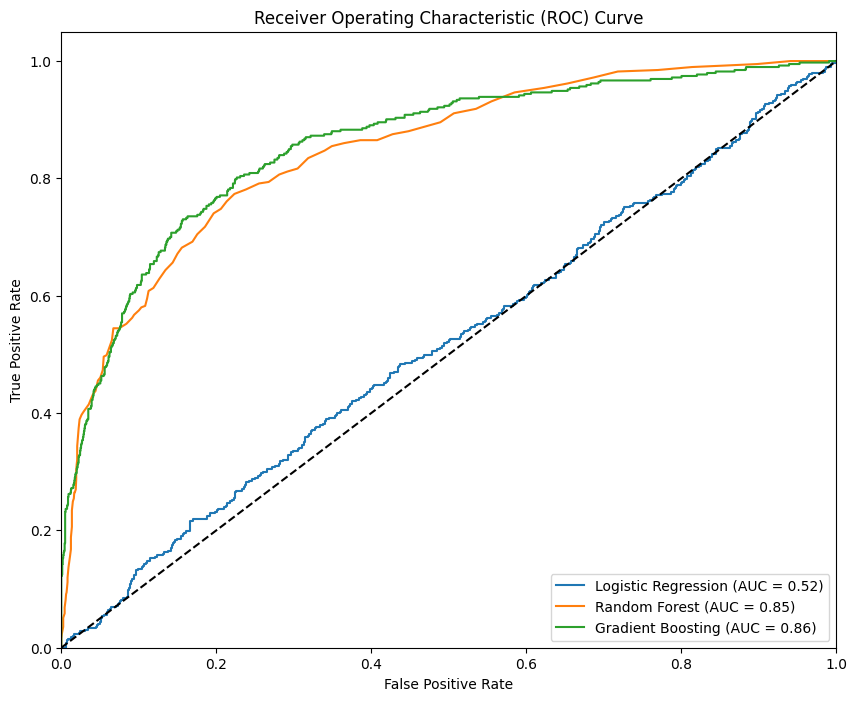

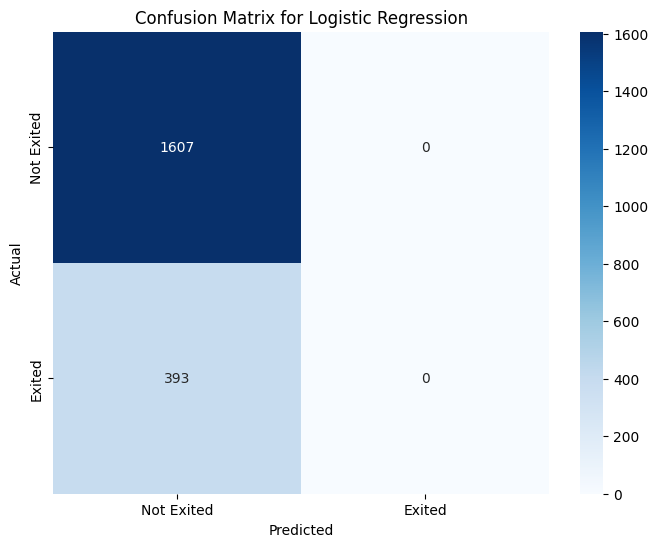

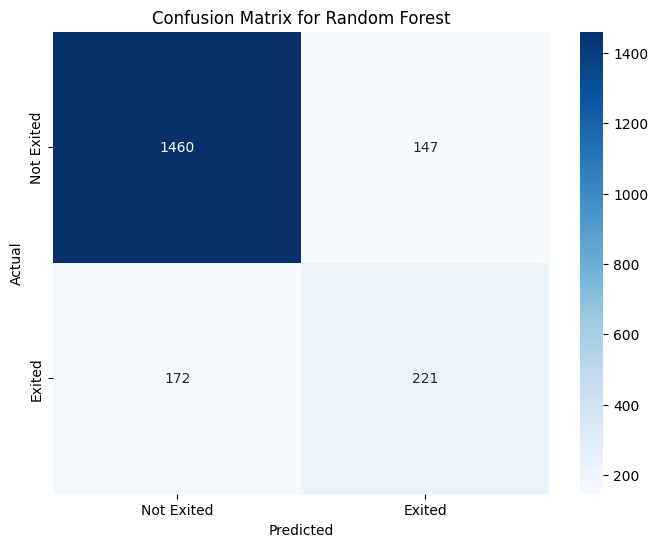

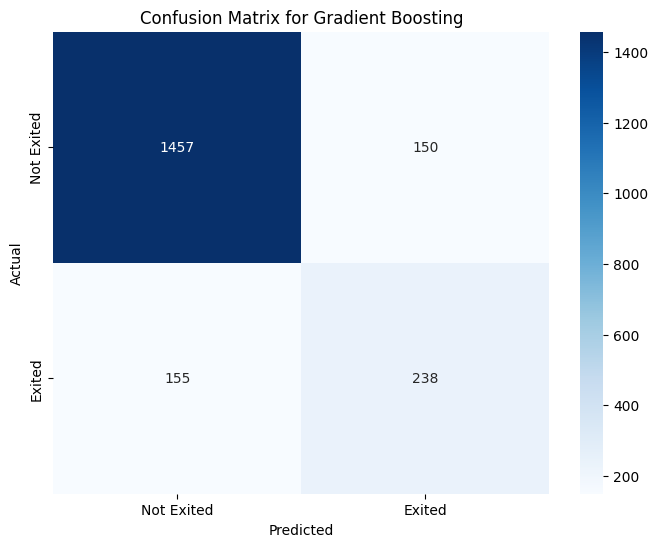

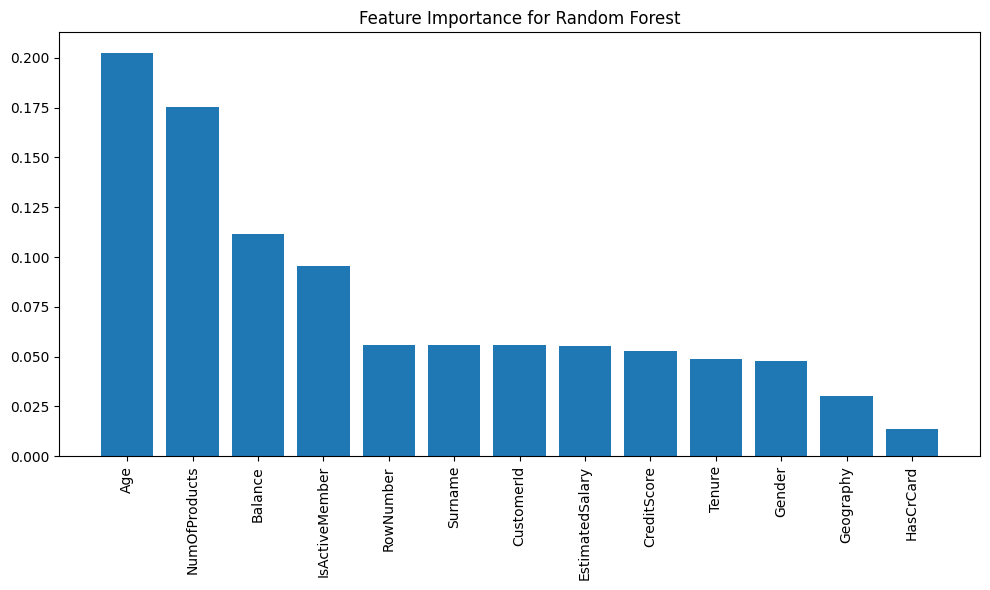

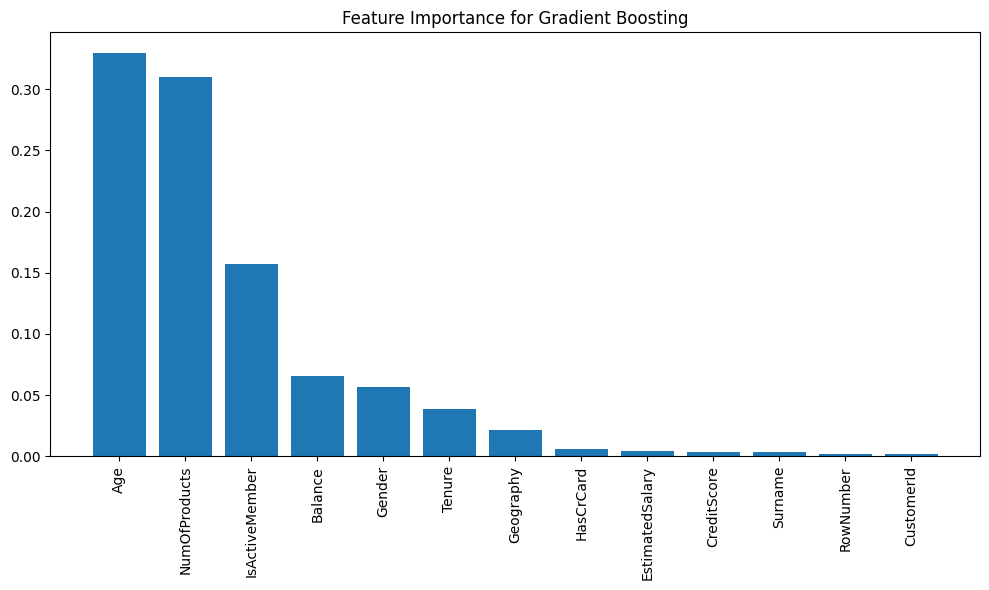

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np

# Train Models (reusing the previous training code)
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train_res, y_train_res)

random_forest = RandomForestClassifier(class_weight='balanced')
random_forest.fit(X_train_res, y_train_res)

grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train_res, y_train_res)

models = [(log_reg, 'Logistic Regression'), (random_forest, 'Random Forest'), (grad_boost, 'Gradient Boosting')]

# Plot ROC Curves
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for model, name in models:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(models, X_test, y_test)

# Plot Confusion Matrices
def plot_confusion_matrix_manual(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {title}')
    plt.show()

def plot_confusion_matrices(models, X_test, y_test):
    for model, name in models:
        plot_confusion_matrix_manual(model, X_test, y_test, name)

plot_confusion_matrices(models, X_test, y_test)

# Plot Feature Importance (for Random Forest and Gradient Boosting)
def plot_feature_importance(model, feature_names, model_name):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importance for {model_name}')
    plt.bar(range(X_test.shape[1]), importance[indices], align='center')
    plt.xticks(range(X_test.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Plot for Random Forest
plot_feature_importance(random_forest, X_test.columns, 'Random Forest')

# Plot for Gradient Boosting
plot_feature_importance(grad_boost, X_test.columns, 'Gradient Boosting')
